 # Proyecto 9

In [2]:
# Abre y examina archivos de datos

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/datasets/users_behavior.csv')
print(df.head())
print(df.info())
print(df.describe())
print(df['is_ultra'].value_counts(normalize=True))

   calls  minutes  messages   mb_used  is_ultra
0   40.0   311.90      83.0  19915.42         0
1   85.0   516.75      56.0  22696.96         0
2   77.0   467.66      86.0  21060.45         0
3  106.0   745.53      81.0   8437.39         1
4   66.0   418.74       1.0  14502.75         0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB
None
             calls      minutes     messages       mb_used     is_ultra
count  3214.000000  3214.000000  3214.000000   3214.000000  3214.000000
mean     63.038892   438.208787    38.281269  17207.673836     0.306472
std      33.236368   234.569872    36.148326   7570.968246  

In [5]:
# Segmenta los datos fuente en un conjunto de entrenamiento, uno de validación y uno de prueba.

X = df.drop('is_ultra', axis=1)
y = df['is_ultra']

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

In [ ]:
# Investiga la calidad de diferentes modelos cambiando los hiperparámetros. Describe brevemente los hallazgos del estudio.

tree_results = []
for depth in range(1, 21):
    tree_model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree_model.fit(X_train, y_train)  # Entrenamos el modelo
    tree_preds = tree_model.predict(X_valid)  # Predicciones en conjunto de validación
    tree_acc = accuracy_score(y_valid, tree_preds)  # Exactitud
    tree_results.append((depth, tree_acc))


print("\n Comparación de DecisionTreeClassifier (max_depth vs. exactitud):")
print("Profundidad\tExactitud")
for depth, acc in tree_results:
    print(f"{depth}\t\t{acc:.4f}")


model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)  # Entrenamos el modelo


In [9]:
#  Comprueba la calidad del modelo usando el conjunto de prueba.

model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)  # Entrenamos el modelo

# Evaluación en conjunto de validación
valid_preds = model.predict(X_valid)
valid_accuracy = accuracy_score(y_valid, valid_preds)
print(f"\n🔍 Precisión en validación: {valid_accuracy:.3f}")
print("\nReporte de clasificación (validación):\n", classification_report(y_valid, valid_preds))

#  Evaluación en conjunto de prueba
test_preds = model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_preds)
print(f"\n✅ Precisión en prueba: {test_accuracy:.3f}")
print("\nReporte de clasificación (prueba):\n", classification_report(y_test, test_preds))



🔍 Precisión en validación: 0.790

Reporte de clasificación (validación):
               precision    recall  f1-score   support

           0       0.81      0.92      0.86       451
           1       0.72      0.48      0.58       192

    accuracy                           0.79       643
   macro avg       0.76      0.70      0.72       643
weighted avg       0.78      0.79      0.78       643


✅ Precisión en prueba: 0.820

Reporte de clasificación (prueba):
               precision    recall  f1-score   support

           0       0.83      0.94      0.88       455
           1       0.79      0.53      0.63       188

    accuracy                           0.82       643
   macro avg       0.81      0.73      0.76       643
weighted avg       0.82      0.82      0.81       643



 El modelo está prediciendo ambas clases correctamente.


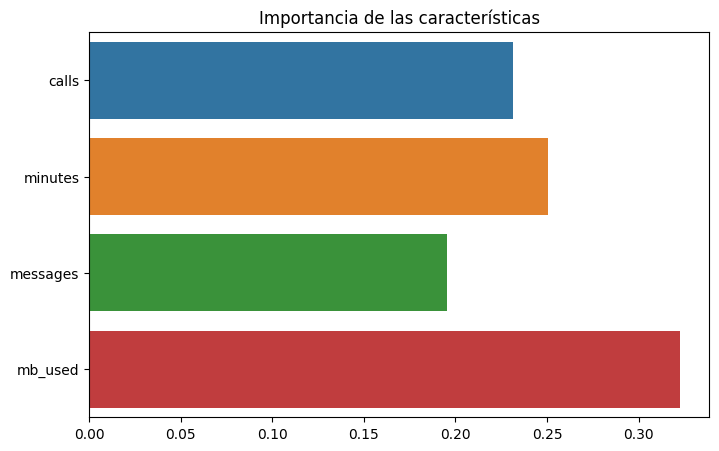


Predicciones con valores extremos: [1 1 1 1 1 1 1 1 1 1]

Reporte de clasificación (prueba):
               precision    recall  f1-score   support

           0       0.83      0.94      0.88       455
           1       0.79      0.53      0.63       188

    accuracy                           0.82       643
   macro avg       0.81      0.73      0.76       643
weighted avg       0.82      0.82      0.81       643



In [12]:
# Tarea adicional: haz una prueba de cordura al modelo. Estos datos son más complejos que los que habías usado antes así que no será una tarea fácil. Más adelante lo veremos con más detalle.

predictions = model.predict(X_test)
unique_predictions = set(predictions)

if len(unique_predictions) == 1:
    print(" El modelo está prediciendo solo una clase. Esto podría ser una señal de un problema con el modelo o los datos.")
else:
    print(" El modelo está prediciendo ambas clases correctamente.")


importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=features)
plt.title('Importancia de las características')
plt.show()

extreme_example = X_test.copy()
extreme_example['calls'] = extreme_example['calls'].max() * 10  # Un valor extremo para 'calls'
extreme_example['minutes'] = extreme_example['minutes'].max() * 10  # Un valor extremo para 'minutes'


extreme_predictions = model.predict(extreme_example)
print("\nPredicciones con valores extremos:", extreme_predictions[:10])


print("\nReporte de clasificación (prueba):\n", classification_report(y_test, predictions))
